In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy import misc

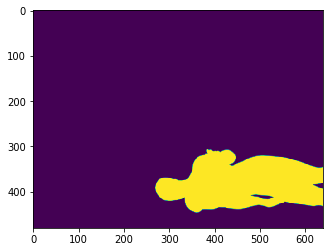

In [24]:
mask = misc.imread('mask2.png')
plt.imshow(mask)
plt.show()

In [32]:
def histograms(mask):
    """
    computes histogram of binaries images along y axis
    (vertical downward) and x axis (horizontal forward)

    returns a tuple of np.arrays (histo_y, histo_x)

    """

    histogram_y = np.dot(mask, np.ones((mask.shape[1], 1)))
    histogram_x = np.dot(mask.T, np.ones((mask.shape[0], 1)))

    return (histogram_y, histogram_x)

In [33]:
def min_max(one_dimensional_array):
    """
    computes the coordinate of the first and last non null
    element in a list or one dimmentional array

    returns a tuple (x_min, x_max)

    """

    x_min = 0
    x_max = len(one_dimensional_array) - 1

    done_min = False
    done_max = False

    count = 0

    while(True):

        if one_dimensional_array[x_min] == 0 and done_min == False and x_min < len(one_dimensional_array) - 1:
            x_min += 1
        else:
            done_min = True
        if one_dimensional_array[x_max] == 0 and done_max == False and x_max > 0:
            x_max -= 1
        else:
            done_max = True
        if done_min == True and done_max == True:
            return (x_min, x_max)

        count += 1

        if count > 10000:
            print("over 10000 null elements in list")
            return (x_min, x_max)

        if x_min > x_max:
            print("only null elements here")
            return (0, 0)

In [37]:
histogram_y, histogram_x = histograms(mask)

xmin, xmax = min_max(histogram_x)
ymin, ymax = min_max(histogram_y)

In [38]:
bbox_mask = mask[ymin:ymax, xmin:xmax]

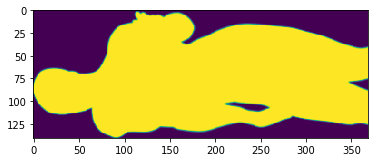

In [39]:
plt.imshow(bbox_mask)
plt.show()